<a href="https://colab.research.google.com/github/olley102/PopulationCountClustering/blob/main/image_processing_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/olley102/PopulationCountClustering.git

Cloning into 'CommunityDetectionURSS'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 70 (delta 24), reused 45 (delta 10), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [2]:
import sys
sys.path.append('/content/PopulationCountClustering')

In [3]:
from image_processing import optical_flow

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
im_arr = np.stack([np.array([
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]
    ])
], axis=-1)

In [7]:
uv = optical_flow.iteration(im_arr, 5, alpha=10, use_previous=True, centering=(0, 0, 0))

In [8]:
uv.shape

(2, 6, 6, 3)

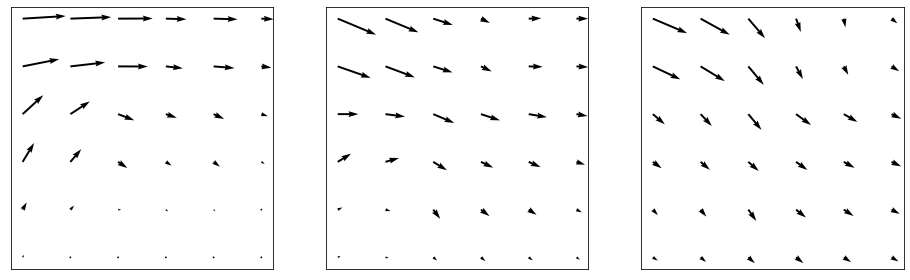

In [9]:
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(131)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_aspect('equal')
plt.quiver(uv[0, ::-1, :, 0], -uv[1, ::-1, :, 0])

ax2 = fig.add_subplot(132)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_aspect('equal')
plt.quiver(uv[0, ::-1, :, 1], -uv[1, ::-1, :, 1])

ax3 = fig.add_subplot(133)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.set_aspect('equal')
plt.quiver(uv[0, ::-1, :, 2], -uv[1, ::-1, :, 2])

plt.show()